# Satellite Imagery Analysis in Python

In [1]:
import rasterio as rio

In [2]:
# Path to the image
# path = "data/small_stacked.tif"


rio.open(path)

In [3]:
data = rio.open(path)

In [3]:
# UTM coordinate
data.crs

In [33]:
data.height

In [34]:
data.width

In [35]:
data.count

In [4]:
data.meta

In [5]:
data

In [6]:
red = data.read(4)
red

In [7]:
green = data.read(3)
green

In [8]:
red.mean()

In [9]:
green.mean()

In [10]:
red.shape

In [11]:
red.shape[1]

In [12]:
red.shape[0]

In [13]:
image_all_bands = data.read()
image_all_bands

In [14]:
image_all_bands.shape

In [19]:
from rasterio.plot import show

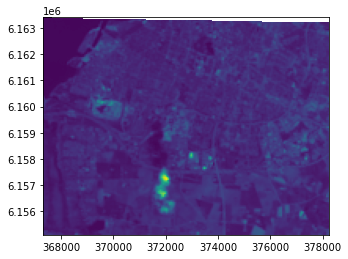

<AxesSubplot:>

In [20]:
show(data)

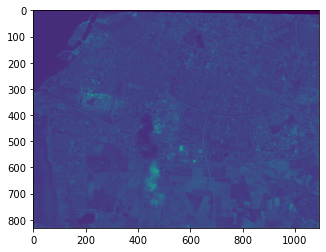

<AxesSubplot:>

In [21]:
show(red)

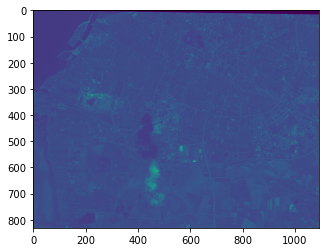

<AxesSubplot:>

In [22]:
show(green)

In [23]:
import matplotlib.pyplot as plt

<AxesSubplot:>

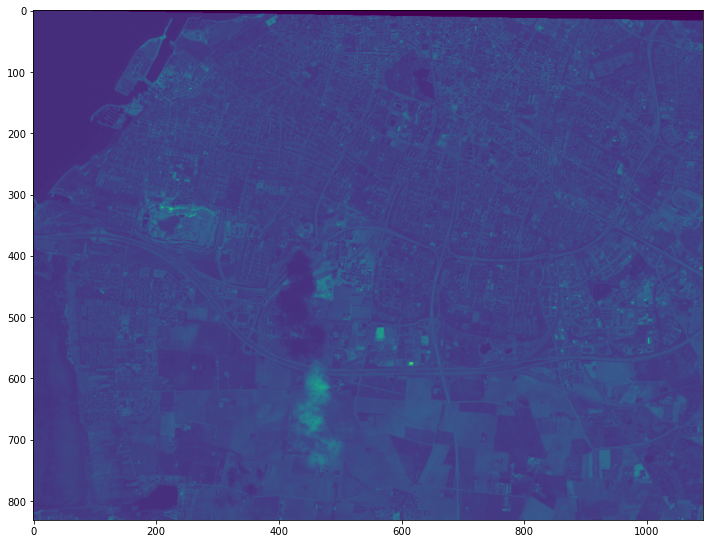

In [24]:
fig, ax = plt.subplots(figsize=(12,10))
show(red, ax=ax)

<AxesSubplot:>

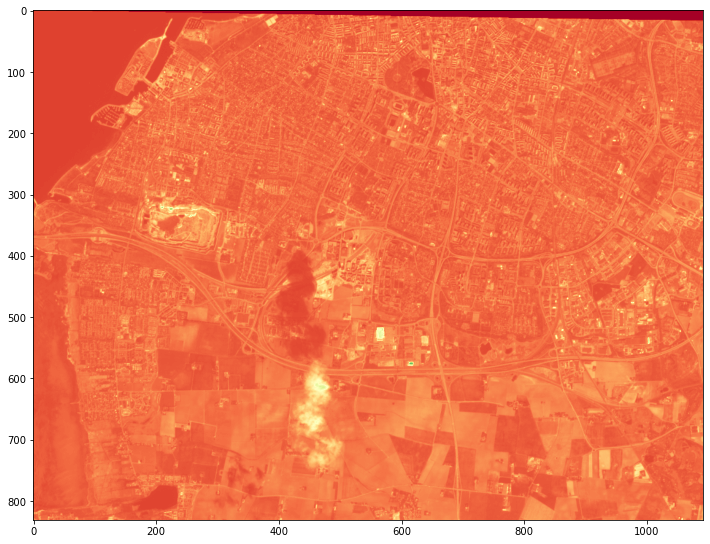

In [25]:
fig, ax = plt.subplots(figsize=(12,10))
show(red, cmap="RdYlGn", ax=ax)

In [15]:
#Call red band (Arrays)
red


In [16]:
# Red band shape

red.shape

In [17]:
# Call all band image arrays
image_all_bands

In [18]:
image_all_bands.shape

In [19]:
# Row indexes

red[200:600]

<AxesSubplot:>

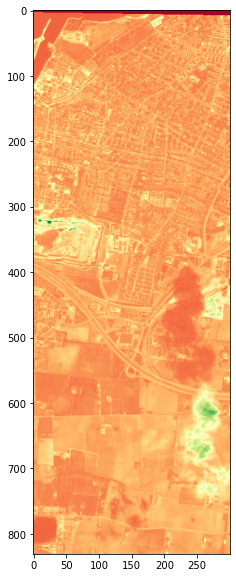

In [32]:
# Visualize row & column indexing
fig, ax = plt.subplots(figsize=(12,10))
show(red[:,200:500], cmap="RdYlGn", ax=ax)

In [33]:
# Import geopandas 
import geopandas as gpd


In [34]:
# Read Vector Data

urban = gpd.read_file("data/vector/urban.shp")

In [36]:
# import mask
from rasterio.mask import mask

In [37]:
# Create masked and transform 
clipped_image, image_transform = mask(data, urban.geometry, crop=True)

In [20]:
# Copy the meta
image_meta = data.meta.copy()
image_meta

In [21]:
# Updata the meta
clipped_image.shape

In [40]:
# Check image shape
image_meta.update({
                'width': clipped_image.shape[1],
                'height': clipped_image.shape[2],
                 'transform': image_transform})


In [41]:
# Create an empty Image and write to the clipped image
rio.open("clipped.tif","w", **image_meta).write(clipped_image)

In [42]:
# Read clipped image from the output folder
urban_image = rio.open("clipped.tif")


In [1]:
# Visualize the clipped image

fig, ax = plt.subplots(figsize=(12,10))
show(urban_image, cmap="RdYlGn", ax=ax)

In [44]:
# Open the original image of band 4
path = "data/original/"
b4 = rio.open(path+"T33UUB_20200421T102021_B04.jp2")

In [45]:
# Open the original image of band 8
b8= rio.open(path+"T33UUB_20200421T102021_B08.jp2")


In [48]:
# read Red(b4) and NIR(b8) as arrays
red = b4.read()

nir = b8.read()

In [49]:
# Calculate ndvi
ndvi = (nir.astype(float) - red.astype(float)) / (nir + red)

In [22]:
ndvi

In [23]:
ndvi.shape

<AxesSubplot:>

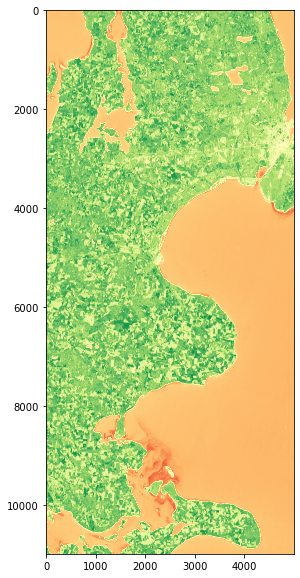

In [55]:
# Visualize a subset

fig, ax = plt.subplots(figsize=(12,10))
show(ndvi[:, :, : 5000], cmap="RdYlGn", ax=ax)

In [57]:
# Write  an NDVI image 
with rio.open("ndvi","w",
             driver="Gtiff",
             width = b4.width,
             height = b4.height,
             count = 1,
             crs=b4.crs,
             transform= b4.transform,
             dtype="float64") as im:
    im.write(ndvi)

In [24]:
# Read Grid Data
grid = gpd.read_file("data/vector/grid.shp")
grid.head()

In [65]:
# Read NDVI 
ndvi_image = rio.open("ndvi.tiff")

<AxesSubplot:>

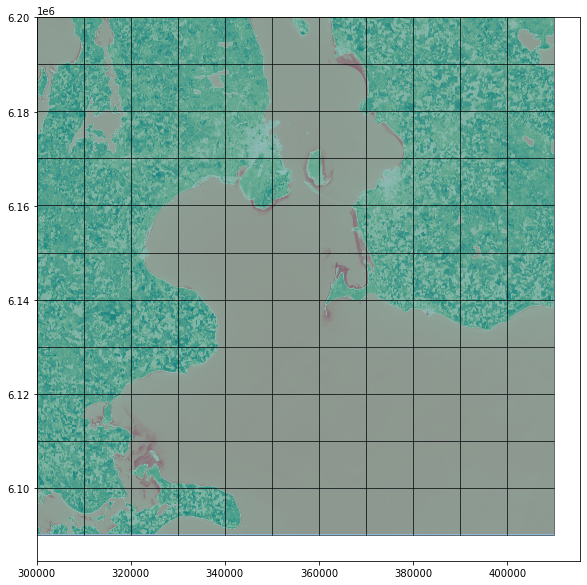

In [66]:
# Plot Both Grid data and NDVI

fig, ax = plt.subplots(figsize=(12,10))
show(ndvi_image, cmap="RdYlGn", ax=ax)
grid.plot(ax=ax, edgecolor="black", alpha=.50)

In [75]:
# Create a funciton to derive stats
def derive_stats(geom, data=ndvi_image):
    masked, _ =  mask(dataset=data, shapes=(geom, ), crop=True, all_touched=True, filled=True)
    return masked

In [76]:
# Create a column for Mean
import numpy as np
grid["mean_ndvi"] = grid.geometry.apply(derive_stats).apply(np.mean)

In [25]:
# Grid head
grid.head()

In [78]:
# Write to file (shapefile or csv)
grid.to_file("grid_stats.shp")

In [79]:
from sklearn.cluster import KMeans

In [80]:
band3 = data.read(3)

In [26]:
band3

<AxesSubplot:>

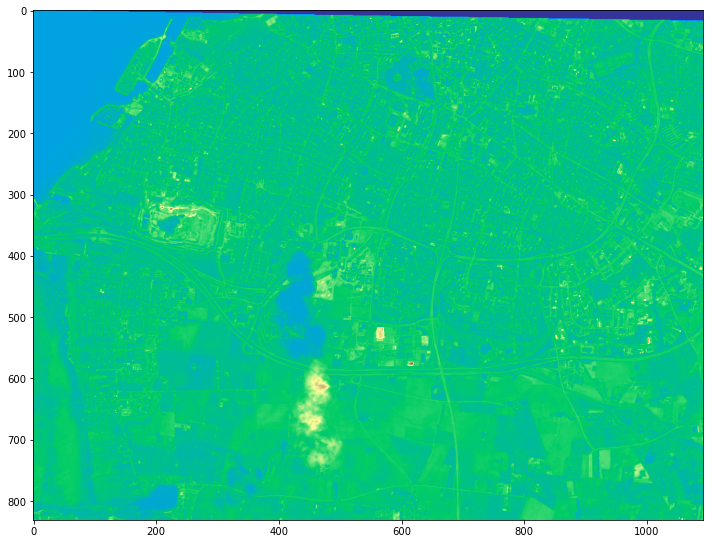

In [82]:
fig, ax = plt.subplots(figsize=(12,10))
show(band3, cmap="terrain", ax=ax)

In [36]:
band3.shape

In [84]:
image_to_cluster = band3.reshape((-1,1))

In [27]:
image_to_cluster.shape

In [28]:
image_to_cluster

In [87]:
k_mean = KMeans(n_clusters=7)

In [29]:
k_mean.fit(image_to_cluster)

In [30]:
clusters = k_mean.labels_
clusters

In [91]:
cluster_image = clusters.reshape(band3.shape)

In [31]:
cluster_image

In [32]:
cluster_image.shape

<AxesSubplot:>

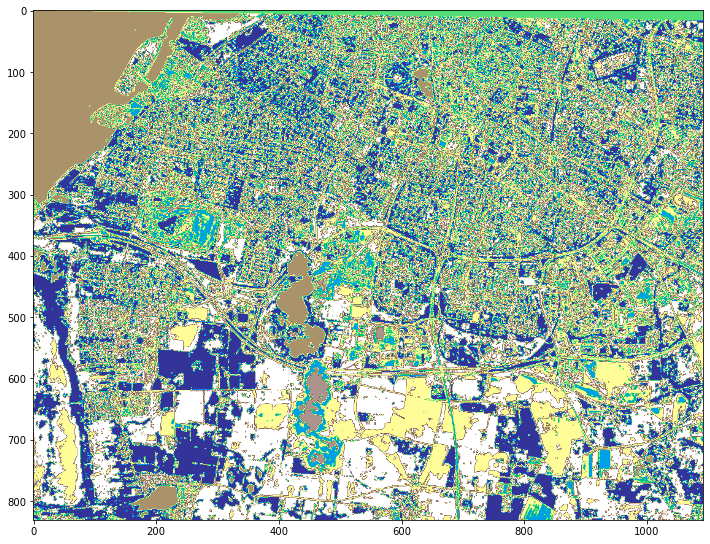

In [94]:
fig, ax = plt.subplots(figsize=(12,10))
show(cluster_image, cmap="terrain", ax=ax)